## Data import, EDA and Cleaning

#### Libraries import

In [1]:
# Libraries import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

#### Datasets import

In [103]:
# train dataset import and review
train = pd.read_csv('../datasets/train.csv')
# test dataset import
test = pd.read_csv('../datasets/test.csv')
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


#### Datasets general review

In [3]:
# How big are the datasets?
train.shape, test.shape

((2051, 81), (878, 80))

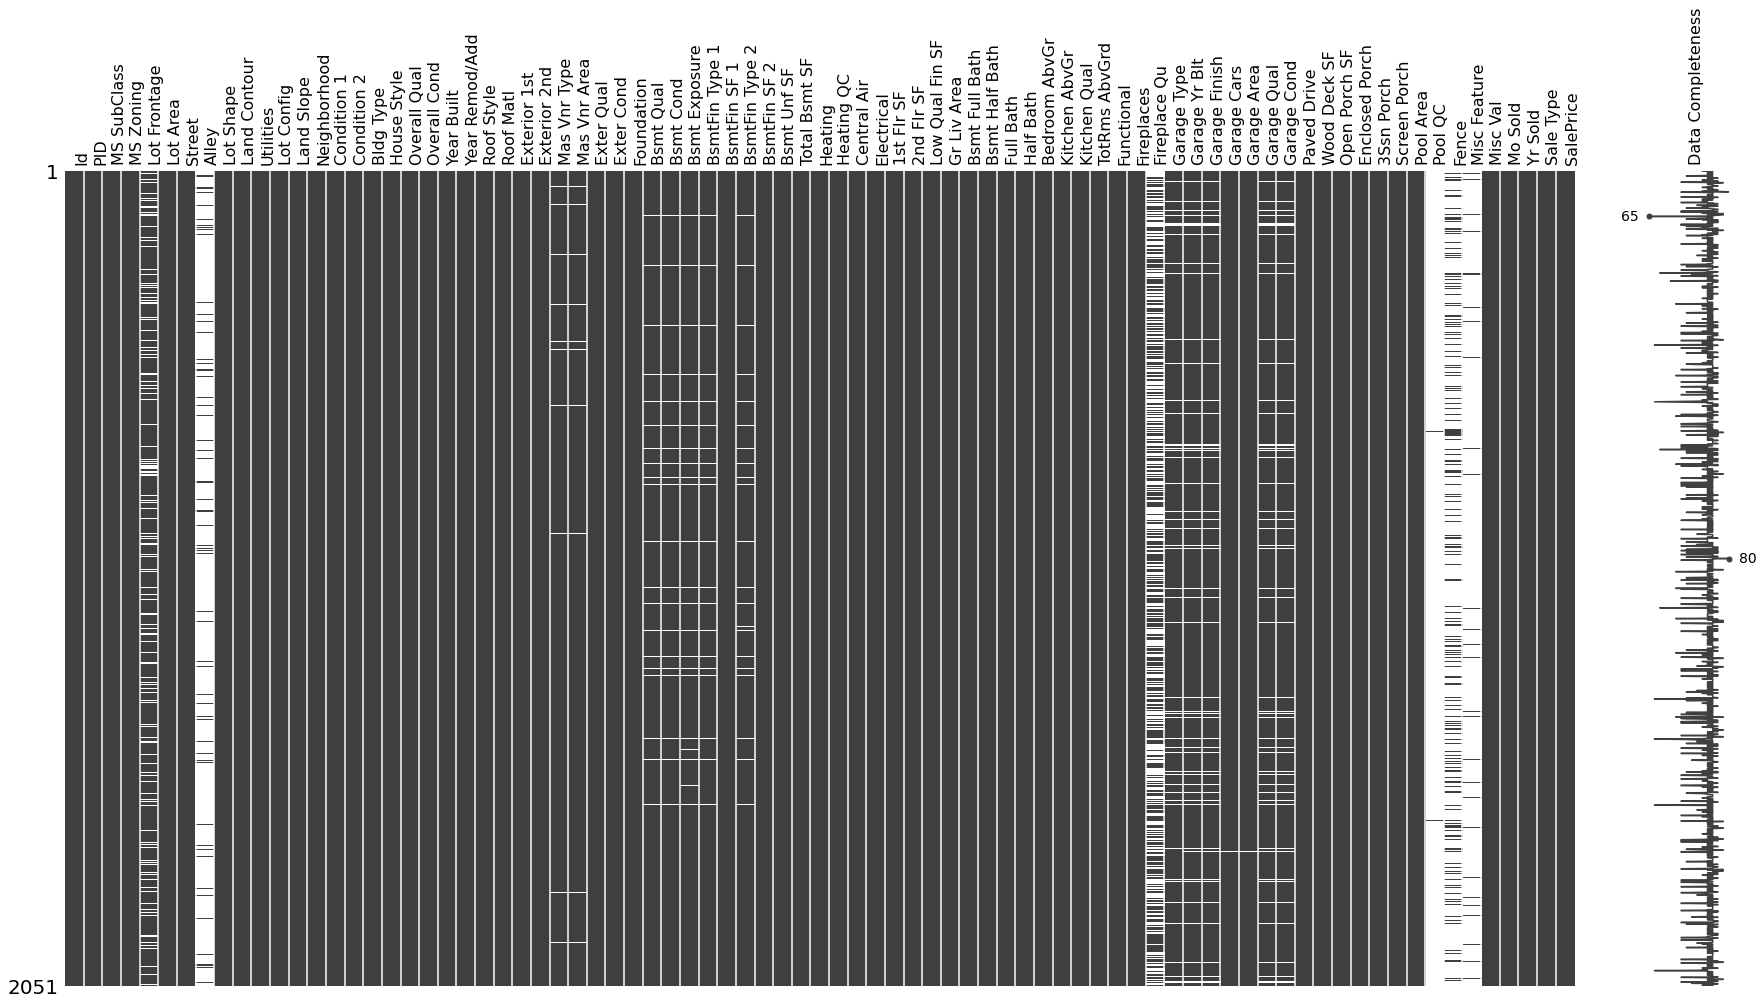

In [4]:
# Visualizing missing values
msno.matrix(train, labels = True, label_rotation = 90, figsize = (30, 15));

In [107]:
# Making column names more appropriate by replacing whitespace with underscores 
train.columns = train.columns.str.lower().str.replace(' ','_')
test.columns = test.columns.str.lower().str.replace(' ','_')

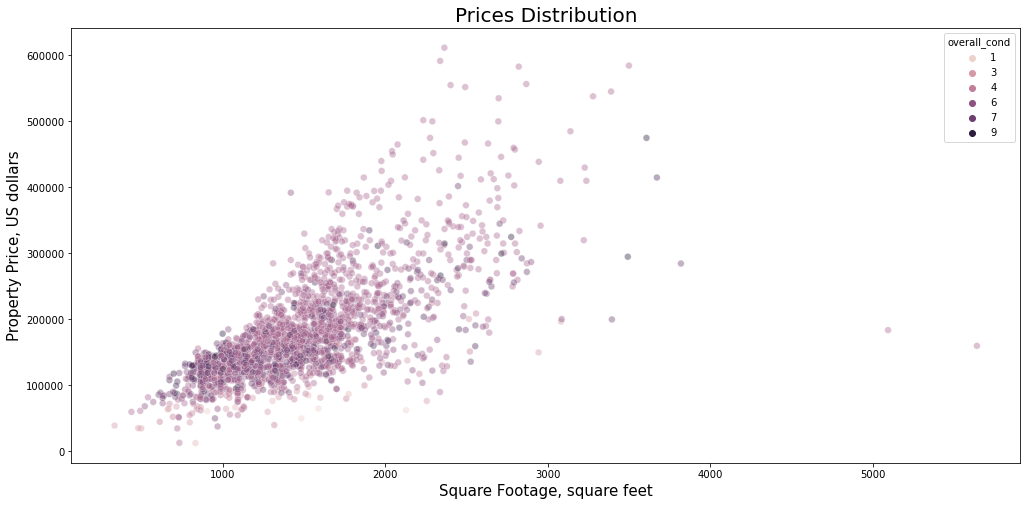

In [129]:
# Visual Assessment
plt.figure(figsize = (17,8))
plt.xlabel('Square Footage, square feet', size = 15)
plt.ylabel('Property Price, US dollars', size = 15)
plt.title('Prices Distribution', size = 20)
sns.scatterplot(data = train, x = 'gr_liv_area', y = 'saleprice', hue = 'overall_cond', s = 45, alpha = 0.4)
plt.savefig('../images/prices.png', dpi = 200);

#### Datasets cleaning column-by-column

##### Id

In [6]:
# Analysing every column to figure out if it's a valid price predictor, 
# if there are any null or invalid values, and if the data type is appropriate
train['id'].describe()

count    2051.000000
mean     1474.033642
std       843.980841
min         1.000000
25%       753.500000
50%      1486.000000
75%      2198.000000
max      2930.000000
Name: id, dtype: float64

In [7]:
# id column can be handy, so we can join it to the original data in case we need more details on a data point
# I'm going to convert it to integer so it occupies less memory
train['id'] = train['id'].astype(int)
test['id'] = test['id'].astype(int)

##### Parcel Id

In [8]:
train['pid'].describe()

count    2.051000e+03
mean     7.135900e+08
std      1.886918e+08
min      5.263011e+08
25%      5.284581e+08
50%      5.354532e+08
75%      9.071801e+08
max      9.241520e+08
Name: pid, dtype: float64

In [9]:
# since we have an id column, I'm going to drop parcel id
train.drop(columns = 'pid', inplace = True)
test.drop(columns = 'pid', inplace = True)

##### MS Subclass

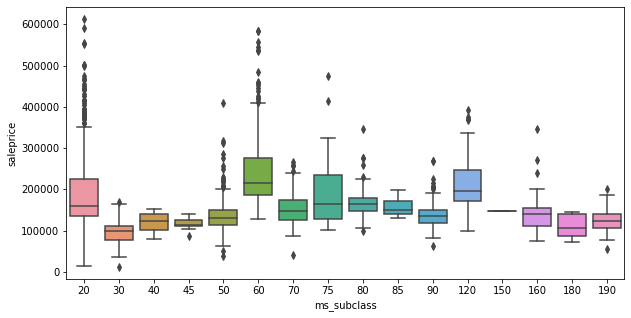

In [10]:
# Are zoning and subclass important for the price of the property?
plt.figure(figsize = (10,5))
sns.boxplot(data = train, x = 'ms_subclass', y = 'saleprice');

##### MS Zoning

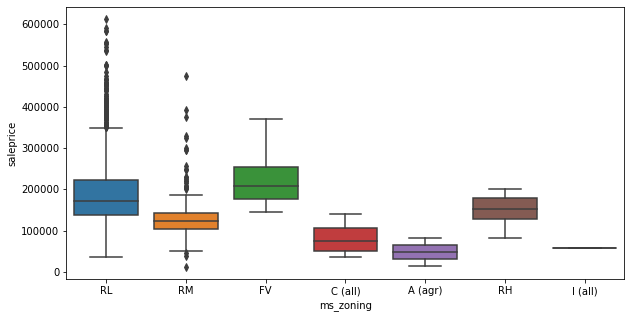

In [11]:
# What about zoning?
plt.figure(figsize = (10,5))
sns.boxplot(data = train, x = 'ms_zoning', y = 'saleprice');

In [12]:
# ms_zoning
train['ms_zoning'].value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: ms_zoning, dtype: int64

In [13]:
test['ms_zoning'].value_counts()

RL         674
RM         146
FV          38
RH          13
C (all)      6
I (all)      1
Name: ms_zoning, dtype: int64

In [14]:
# Since there's no agriculture properties in test data, I'm going to drop these entries . There are only two of them and I don't want them to affect the model.
train = train[train['ms_zoning'] != 'A (agr)']

##### Lot Frontage

In [15]:
# Lot frontage
# As long as it has a lot of null values and doesn't seem to be a valuable predictor, I'm going to remove it
train.drop(columns = 'lot_frontage', inplace = True)
test.drop(columns = 'lot_frontage', inplace = True)

##### Lot Area

In [16]:
# Lot area must be one of the most important price factors. Let's explore it
train['lot_area'].describe()

count      2049.000000
mean      10052.663738
std        6728.765569
min        1300.000000
25%        7500.000000
50%        9405.000000
75%       11500.000000
max      159000.000000
Name: lot_area, dtype: float64

##### Street and Alley

In [17]:
# Street
train['street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [18]:
# Alley 
train.alley.unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

In [19]:
# Street column can be converted to dummy, when alley doesn't seem sufficient for the price prediction
train = pd.concat([train, pd.get_dummies(train['street'], drop_first = True)], axis = 1)
test = pd.concat([test, pd.get_dummies(test['street'], drop_first = True)], axis = 1)

train.drop(columns = ['alley', 'street'], inplace = True)
test.drop(columns = ['alley', 'street'], inplace = True)

train.rename(columns={'Pave': 'paved'}, inplace = True)
test.rename(columns={'Pave': 'paved'}, inplace = True)

##### Lot Shape & Lot Contour

In [20]:
# lot_shape
train.lot_shape.value_counts()

Reg    1293
IR1     692
IR2      55
IR3       9
Name: lot_shape, dtype: int64

In [21]:
# land_contour
train.land_contour.value_counts()

Lvl    1842
HLS      85
Bnk      80
Low      42
Name: land_contour, dtype: int64

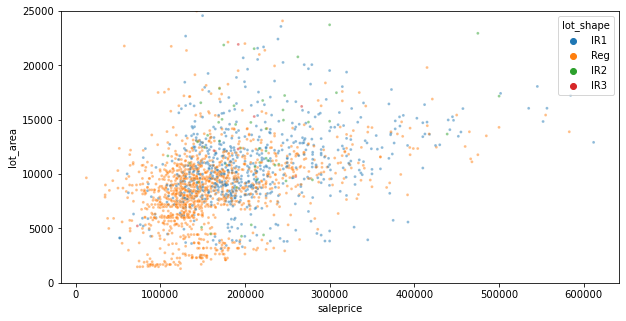

In [22]:
# Looking at visual relationship
plt.figure(figsize = (10,5))
sns.scatterplot(data=train, x='saleprice', y='lot_area', hue='lot_shape', s = 8, alpha = 0.5)
plt.ylim(0,25000);

In [23]:
train.groupby(by = 'lot_shape')['saleprice'].mean()

lot_shape
IR1    211848.670520
IR2    233954.745455
IR3    193182.222222
Reg    163104.661253
Name: saleprice, dtype: float64

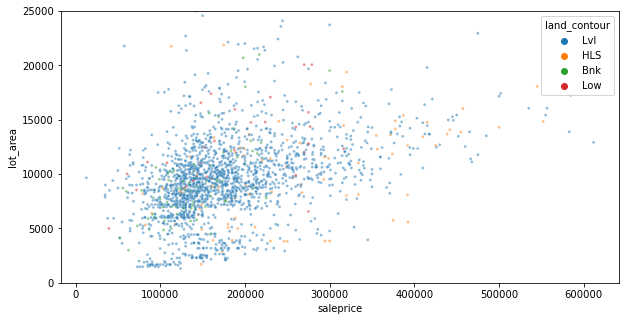

In [24]:
# Same for land_contour
plt.figure(figsize = (10,5))
sns.scatterplot(data=train, x='saleprice', y='lot_area', hue='land_contour', s = 8, alpha = 0.5);
plt.ylim(0,25000);

In [25]:
# Irregularly shaped lots seem to cost more, so I'm going to merge all irregular types into one and turn the column into boolean
train['irregular'] = train.apply(lambda x: 0 if x.lot_shape == 'Reg' else 1, axis = 1)
test['irregular'] = test.apply(lambda x: 0 if x.lot_shape == 'Reg' else 1, axis = 1)

train.drop(columns = ['lot_shape', 'land_contour'], inplace = True)
test.drop(columns = ['lot_shape', 'land_contour'], inplace = True)

##### Utilities

In [26]:
# utilities
train['utilities'].value_counts()

AllPub    2047
NoSeWa       1
NoSewr       1
Name: utilities, dtype: int64

In [27]:
# Mostly all the properties have utilities, so I'm going to remove this column
train.drop(columns = ['utilities'], inplace = True)
test.drop(columns = ['utilities'], inplace = True)

##### Lot Configuration

In [28]:
# Lot Configuration
train['lot_config'].value_counts()

Inside     1501
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: lot_config, dtype: int64

In [29]:
train.groupby(by = 'lot_config')['saleprice'].mean()

lot_config
Corner     180629.591954
CulDSac    230744.358779
FR2        174703.600000
FR3        198600.000000
Inside     177710.548301
Name: saleprice, dtype: float64

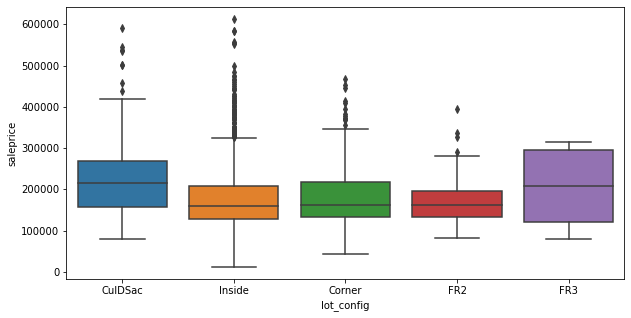

In [30]:
plt.figure(figsize = (10,5))
sns.boxplot(data = train, x = 'lot_config', y = 'saleprice');

In [31]:
# Based on the boxplot, Cul De Sac properties are more expensive, so I'm going to transform this column to binary
train['cul_de_sac'] = train.apply(lambda x: 1 if x.lot_config == 'CulDSac' else 0, axis = 1)
test['cul_de_sac'] = test.apply(lambda x: 1 if x.lot_config == 'CulDSac' else 0, axis = 1)

train.drop(columns = ['lot_config'], inplace = True)
test.drop(columns = ['lot_config'], inplace = True)

##### Land Slope

In [32]:
train['land_slope'].value_counts()

Gtl    1952
Mod      87
Sev      10
Name: land_slope, dtype: int64

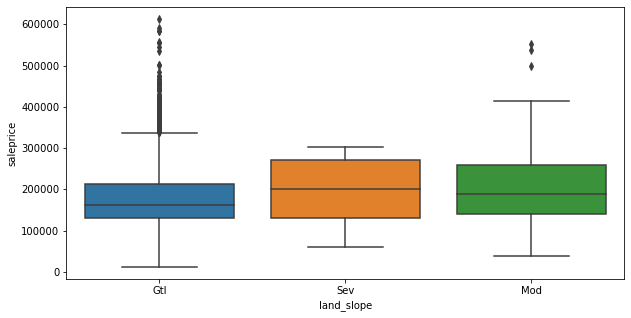

In [33]:
plt.figure(figsize = (10,5))
sns.boxplot(data = train, x = 'land_slope', y = 'saleprice');

In [34]:
# Looks like properties with moderate-severe slopes are more expensive, so in my opinion it makes sense to merge Severe and Moderate slopes together into "slope present" binary column
train['land_slope'] = train['land_slope'].map(lambda x: 0 if x == 'Gtl' else 1)
test['land_slope'] = test['land_slope'].map(lambda x: 0 if x == 'Gtl' else 1)

##### Neighborhood

In [35]:
# Looking for potential typos
sorted(train.neighborhood.unique())

['Blmngtn',
 'Blueste',
 'BrDale',
 'BrkSide',
 'ClearCr',
 'CollgCr',
 'Crawfor',
 'Edwards',
 'Gilbert',
 'Greens',
 'GrnHill',
 'IDOTRR',
 'Landmrk',
 'MeadowV',
 'Mitchel',
 'NAmes',
 'NPkVill',
 'NWAmes',
 'NoRidge',
 'NridgHt',
 'OldTown',
 'SWISU',
 'Sawyer',
 'SawyerW',
 'Somerst',
 'StoneBr',
 'Timber',
 'Veenker']

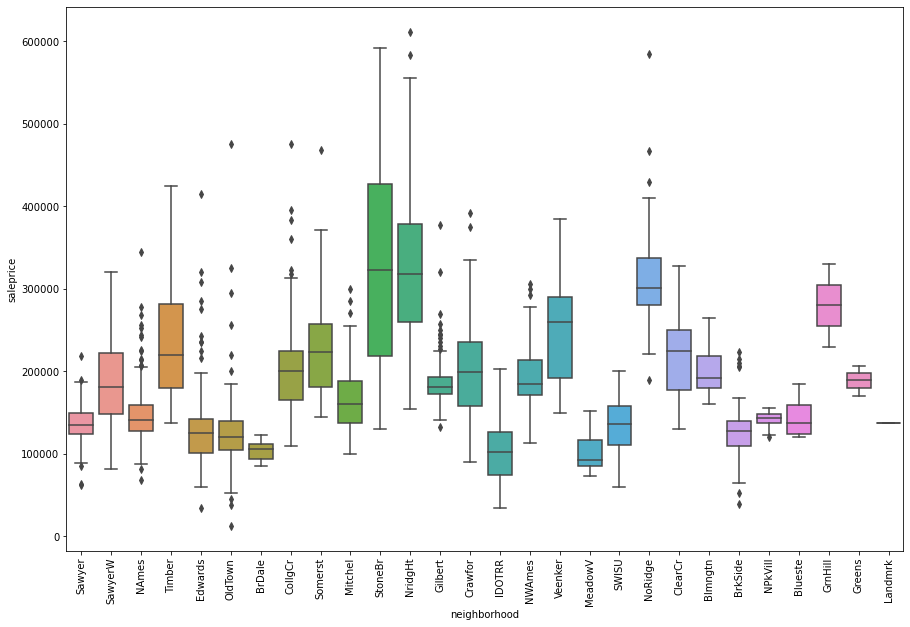

In [36]:
# Looks good compared to the data dictionary. Whats about prices distrubution between different neighborhoods?
plt.figure(figsize = (15,10))
sns.boxplot(data = train, x = 'neighborhood', y = 'saleprice')
plt.xticks(rotation = 90);

In [37]:
# Neighborhood is definitely important for the price prediction. But if to keep it as a categorical value, number of features may be too large. I think it's a good idea to convert these to median price per neighborhood. 
# I'm using median instead of mean, because based on the boxplot, it's better to use a metric that is less sensitive to outliers, since there are a lot of them. 
neighborhood_median = train.groupby(by = 'neighborhood')['saleprice'].median()

# merging series with median prices into dataframes
train = train.merge(neighborhood_median.to_frame(), how = 'left', on = 'neighborhood')
test = test.merge(neighborhood_median.to_frame(), how = 'left', on = 'neighborhood')

# Renaming columns
train.rename(columns={'saleprice_x': 'saleprice', 'saleprice_y': 'neighborhood_median'}, inplace = True)
test.rename(columns={'saleprice': 'neighborhood_median'}, inplace = True)

# Dropping old columns
train.drop(columns = ['neighborhood'], inplace = True)
test.drop(columns = ['neighborhood'], inplace = True)

##### Condition 1 and Condition 2

In [38]:
train.condition_1.value_counts()

Norm      1766
Feedr      109
Artery      69
RRAn        36
PosN        27
RRAe        21
PosA        12
RRNn         6
RRNe         3
Name: condition_1, dtype: int64

In [39]:
train.condition_2.value_counts()

Norm      2023
Feedr       11
Artery       5
PosA         3
PosN         3
RRNn         2
RRAe         1
RRAn         1
Name: condition_2, dtype: int64

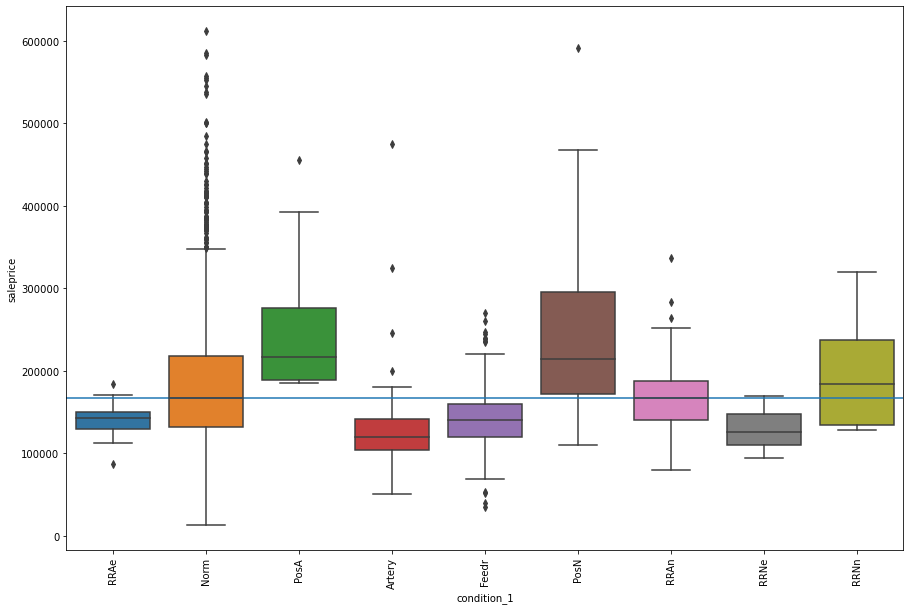

In [40]:
plt.figure(figsize = (15,10))
sns.boxplot(data = train, x = 'condition_1', y = 'saleprice')
plt.axhline(train[train['condition_1'] == 'Norm'].saleprice.median())
plt.xticks(rotation = 90);

In [41]:
# Prices are varying significantly for properties with positive features nearby and located by noisy objects. 
# I'm going to create two new columns: 
# - 'positive_feature' for those rows that have PosA or PosN associated with them.
# - 'noisy' if: Adjacent to East-West Railroad, Within 200' of East-West Railroad, Artery, Feedr. North-South Railroad is probably too quiet, so property prices aren't affected by it's presence.

# Positive feature
train['condition_12'] = train['condition_1'] + train['condition_2']
test['condition_12'] = test['condition_1'] + train['condition_2']

train['positive_feature'] = train['condition_12'].apply(lambda x: 1 if 'Pos' in x else 0)
test['positive_feature'] = test['condition_12'].apply(lambda x: 1 if 'Pos' in x else 0)


# Noisy
def ifn(s):
    '''
    Function converts type of the noise source to binary data where 1 == noisy
    '''
    count = 0
    if 'RRAe' in s:
        count = 1
    elif 'Artery' in s:
        count = 1
    elif 'Feedr' in s:
        count = 1
    elif 'RRNe' in s:
        count = 1
    else:
        count = 0
    return count

train['noisy'] = train['condition_12'].apply(lambda x: ifn(x))
test['noisy'] = test['condition_12'].apply(lambda x: ifn(x))

In [42]:
# Dropping  initial columns
train.drop(columns = ['condition_1', 'condition_2', 'condition_12'], inplace = True)
test.drop(columns = ['condition_1', 'condition_2', 'condition_12'], inplace = True)

##### Bldg Type

In [43]:
train.bldg_type.value_counts()

1Fam      1698
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: bldg_type, dtype: int64

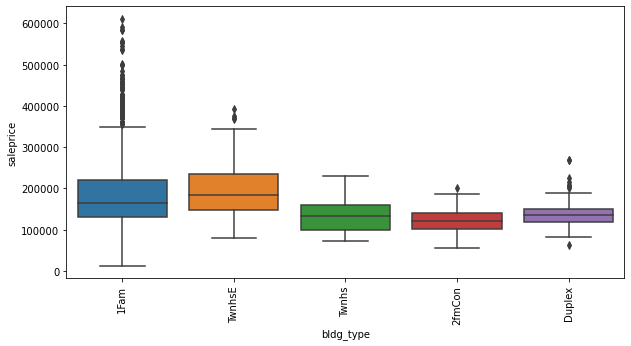

In [44]:
plt.figure(figsize = (10,5))
sns.boxplot(data = train, x = 'bldg_type', y = 'saleprice')
#plt.axhline(train[train['condition_1'] == 'Norm'].saleprice.median())
plt.xticks(rotation = 90);

In [45]:
# Dwelling type seems to contribute slightly to the price, but I'm not going to use it in my models this time

##### House Style

In [46]:
train.house_style.value_counts()

1Story    1057
2Story     598
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: house_style, dtype: int64

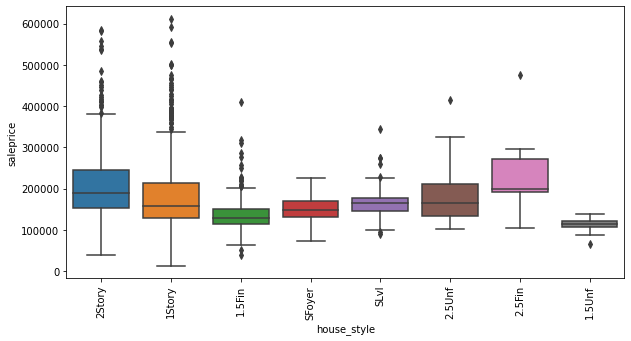

In [47]:
plt.figure(figsize = (10,5))
sns.boxplot(data = train, x = 'house_style', y = 'saleprice')
#plt.axhline(train[train['condition_1'] == 'Norm'].saleprice.median())
plt.xticks(rotation = 90);

In [48]:
# Same with house style - it's somewhat important, but I'm not going to use it this time

##### Overall Qualilty and Condition

In [49]:
# I'm going to merge these together into one column
train['score'] = train['overall_qual'] + train['overall_cond']
test['score'] = test['overall_qual'] + test['overall_cond']

#Dropping unneeded columns
train.drop(columns = ['bldg_type', 'house_style', 'overall_qual', 'overall_cond'], inplace = True)
test.drop(columns = ['bldg_type', 'house_style', 'overall_qual', 'overall_cond'], inplace = True)

##### Year built and Year remodeled

In [50]:
# I'm going to use remodeling year, because its >= then construction date. Also I'm going to deduct this from Year sold so the value is 'normalized'
train['years_old'] = train['yr_sold'] - train['year_remod/add']
test['years_old'] = test['yr_sold'] - test['year_remod/add']

# Dropping old columns
train.drop(columns = ['year_built', 'year_remod/add'], inplace = True)
test.drop(columns = ['year_built', 'year_remod/add'], inplace = True)

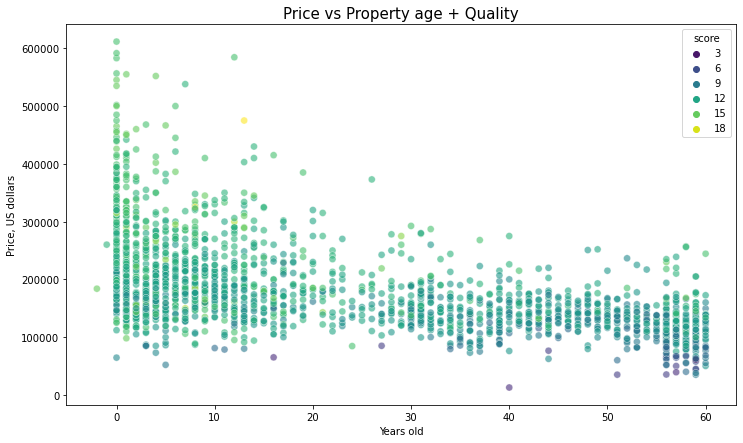

In [51]:
# Let's see what's the relationship between price and Years Old column
plt.figure(figsize = (12,7))
sns.scatterplot(data=train, x='years_old', y='saleprice', hue='score', s = 50, alpha = 0.6, palette='viridis');
plt.xlabel('Years old')
plt.ylabel('Price, US dollars')
plt.title ('Price vs Property age + Quality', size = 15)
plt.savefig('../images/price_vs_age_score.png', dpi = 200);

Age of the property and its overall score contribute to the price for sure, since we can see a strong relationship between them on a scatterplot above.  
Next, I'm going to remove all the miscellaneous columns that don't matter in my opinion because being too minor, or already related to other features I've already included.



##### Removing minor features

In [52]:
cols = train.columns[5:22]

train.drop(columns = cols, inplace = True)
test.drop(columns = cols, inplace = True)

##### Basement Area


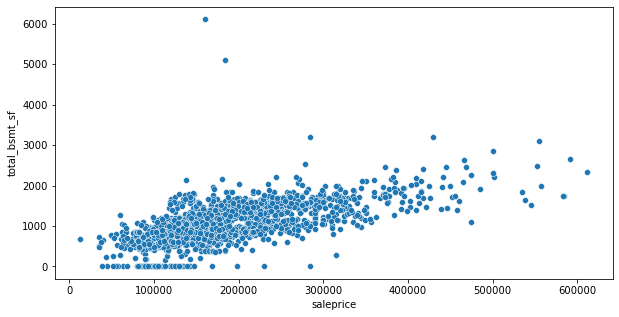

In [53]:
plt.figure(figsize = (10,5))
sns.scatterplot(data=train, x='saleprice', y='total_bsmt_sf');
#plt.ylim(0,25000);

In [54]:
# There's a strong positive correlation between basement area and price, so I'm going to keep this column 

##### Heating

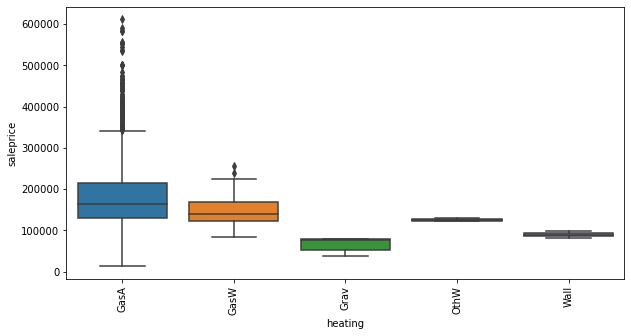

In [55]:
plt.figure(figsize = (10,5))
sns.boxplot(data = train, x = 'heating', y = 'saleprice')
#plt.axhline(train[train['condition_1'] == 'Norm'].saleprice.median())
plt.xticks(rotation = 90);

In [56]:
train['heating'].value_counts()

GasA    2017
GasW      20
Grav       5
Wall       5
OthW       2
Name: heating, dtype: int64

In [57]:
# Heating systems that are not GasA aren't common enough to include them into price prediction models in my opinion
train.drop(columns = 'heating', inplace = True)
test.drop(columns = 'heating', inplace = True)

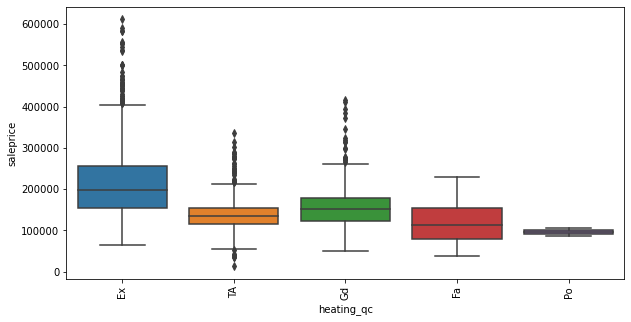

In [58]:
# Is heating system quality important?
plt.figure(figsize = (10,5))
sns.boxplot(data = train, x = 'heating_qc', y = 'saleprice')
#plt.axhline(train[train['condition_1'] == 'Norm'].saleprice.median())
plt.xticks(rotation = 90);

In [59]:
# There's definitely a correlation between heating system condition and price, so I'm going to keep this feature. But I'm going to convert it into score
def score(s):
    '''
    Function converts verbal assessment into numeric score for Heating System column
    '''
    if s == 'Po':
        return 1
    elif s == 'Fa':
        return 2
    elif s == 'TA':
        return 3
    elif s == 'Gd':
        return 4
    else:
        return 5

train['heating_qc'] = train['heating_qc'].apply(lambda x: score(x)).astype(int)
test['heating_qc'] = test['heating_qc'].apply(lambda x: score(x)).astype(int)

##### Central Air

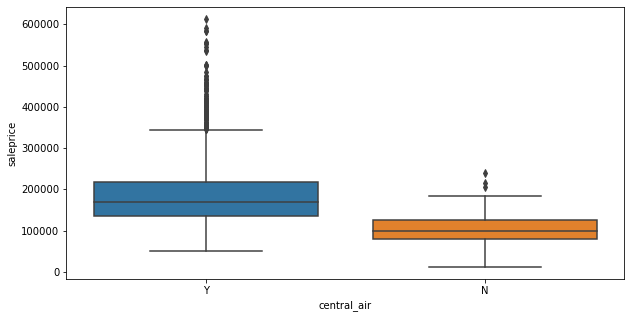

In [60]:
# How does Central Air Conditioning affect the price?
plt.figure(figsize = (10,5))
sns.boxplot(data = train, x = 'central_air', y = 'saleprice');

In [61]:
# Significantly, so I'm going to use it, but converted to 1 and zeros
train['central_air'] = train['central_air'].map(lambda i: 1 if i == 'Y' else 0)
test['central_air'] = test['central_air'].map(lambda i: 1 if i == 'Y' else 0)

##### Electrical

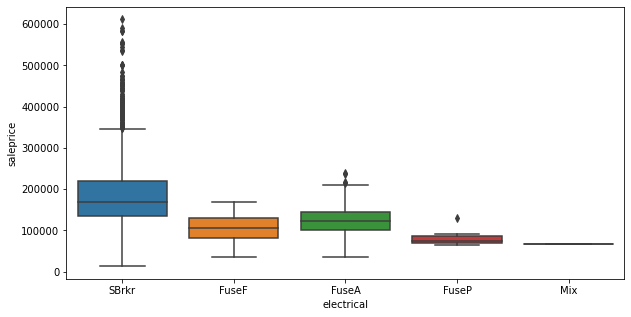

In [62]:
plt.figure(figsize = (10,5))
sns.boxplot(data = train, x = 'electrical', y = 'saleprice');

In [63]:
# Same as with AC quality - there's a dependency between electrical system condition and price. I'm going to convert these to scores too
def score_e(s):
    '''
    Function converts verbal assessment into numeric score for Electrical System column
    '''
    if s == 'Mix':
        return 1
    elif s == 'FuseP':
        return 2
    elif s == 'FuseF':
        return 3
    elif s == 'FuseA':
        return 4
    else:
        return 5

train['electrical'] = train['electrical'].apply(lambda x: score_e(x)).astype(int)
test['electrical'] = test['electrical'].apply(lambda x: score_e(x)).astype(int)

##### Square Footage

In [64]:
# Exploring Square Footage columns
train[['1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf','gr_liv_area']]

,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area
0,725,754,0,1479
1,913,1209,0,2122
2,1057,0,0,1057
3,744,700,0,1444
4,831,614,0,1445
...,...,...,...,...
2044,1728,0,0,1728
2045,861,0,0,861
2046,1172,741,0,1913
2047,1200,0,0,1200


In [65]:
# Columns 1st_flr_sf, 2nd_flr_sf, low_qual_fin_sf are obsolete, since gr_liv_area encounters all of them
train.drop(columns = ['1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf'], inplace = True)
test.drop(columns = ['1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf'], inplace = True)

##### Baths and Rooms 

In [66]:
train[['bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr','kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional']]

,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional
0,0.0,0.0,2,1,3,1,Gd,6,Typ
1,1.0,0.0,2,1,4,1,Gd,8,Typ
2,1.0,0.0,1,0,3,1,Gd,5,Typ
3,0.0,0.0,2,1,3,1,TA,7,Typ
4,0.0,0.0,2,0,3,1,TA,6,Typ
...,...,...,...,...,...,...,...,...,...
2044,1.0,0.0,2,0,3,1,Gd,7,Typ
2045,0.0,0.0,1,0,1,1,TA,4,Typ
2046,0.0,0.0,1,1,3,1,TA,9,Typ
2047,1.0,0.0,1,0,3,1,TA,6,Typ


In [67]:
# I'm going to use only totrms_abvgrd
train.drop(columns = ['bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr','kitchen_abvgr', 'kitchen_qual', 'functional'], inplace = True)
test.drop(columns = ['bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr','kitchen_abvgr', 'kitchen_qual', 'functional'], inplace = True)

##### Garage

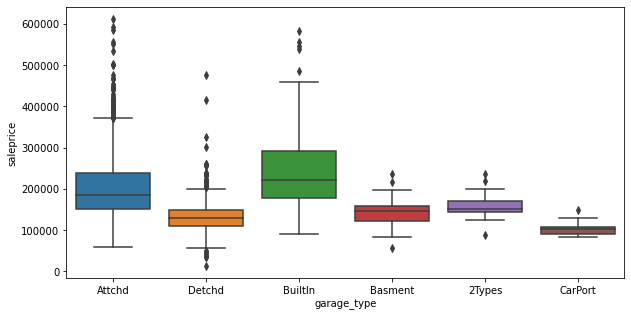

In [68]:
# What prices differences are depending on a garage type?
plt.figure(figsize = (10,5))
sns.boxplot(data = train, x = 'garage_type', y = 'saleprice');

In [69]:
# How many values per garage type?
train.garage_type.value_counts()

Attchd     1211
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: garage_type, dtype: int64

In [70]:
# What are median prices per garage type?
train.groupby(by = 'garage_type')['saleprice'].median()

garage_type
2Types     150000.0
Attchd     185900.0
Basment    145000.0
BuiltIn    221900.0
CarPort    101800.0
Detchd     129500.0
Name: saleprice, dtype: float64

In [71]:
#The price is quite diverse based on the garage type, so I;m going to convert it into numerical score
def score_g(s):
    '''
    Function converts garage type into numeric score for Garage column
    '''
    if s == 'CarPort':
        return 1
    elif s == 'Detchd':
        return 2
    elif s == 'Basment':
        return 3
    elif s == '2Types':
        return 3
    elif s == 'Attchd':
        return 4
    else:
        return 5

train['garage_type'] = train['garage_type'].apply(lambda x: score_g(x)).astype(int)
test['garage_type'] = test['garage_type'].apply(lambda x: score_g(x)).astype(int)

In [72]:
# Removing excessive columns 
train.drop(columns = ['fireplaces', 'fireplace_qu', 'garage_yr_blt', 'garage_finish', 'garage_cars', 'garage_area', 'garage_qual', 'garage_cond', 'paved_drive'], inplace = True)
test.drop(columns = ['fireplaces', 'fireplace_qu', 'garage_yr_blt', 'garage_finish', 'garage_cars', 'garage_area', 'garage_qual', 'garage_cond', 'paved_drive'], inplace = True)

##### Non-living Area

In [73]:
# Adding all non-living square footage together
train['non-living'] = train['total_bsmt_sf'] + train['wood_deck_sf'] + train['open_porch_sf'] + train['enclosed_porch'] + train['3ssn_porch'] + train['screen_porch']
test['non-living'] = test['total_bsmt_sf'] + test['wood_deck_sf'] + test['open_porch_sf'] + test['enclosed_porch'] + test['3ssn_porch'] + test['screen_porch']

# Removing columns that are not needed anymore
train.drop(columns = ['total_bsmt_sf', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch'], inplace = True)
test.drop(columns = ['total_bsmt_sf', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch'], inplace = True)

##### Pool

In [74]:
# Pool is to be represented as boolean feature, where 1 means that property has a pool 
train.pool_area.describe()

count    2049.000000
mean        2.400195
std        37.800940
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: pool_area, dtype: float64

In [75]:
# How many properties with a pool there are?
train[train['pool_area'] > 0]

,id,ms_subclass,ms_zoning,lot_area,land_slope,heating_qc,central_air,electrical,gr_liv_area,totrms_abvgrd,...,saleprice,paved,irregular,cul_de_sac,neighborhood_median,positive_feature,noisy,score,years_old,non-living
52,2351,60,RL,16692,0,3,1,5,2784,12,...,250000,1,1,0,185000.0,0,0,12,28,1944.0
655,1567,80,RL,9880,0,3,1,5,1118,6,...,171000,1,0,0,160000.0,0,0,12,31,1299.0
759,2499,80,RL,14330,0,4,1,5,2646,9,...,260000,1,1,0,260000.0,0,0,11,32,2489.0
950,2231,20,RL,18044,0,4,1,5,2726,6,...,315000,1,1,1,199500.0,0,0,13,21,728.0
958,1499,60,RL,63887,0,5,1,5,5642,12,...,160000,1,1,0,125000.0,0,1,15,0,6616.0
1128,2358,20,RL,10140,0,2,1,5,1309,5,...,181000,1,0,0,185000.0,0,0,12,7,1305.0
1247,2736,80,RL,19690,0,3,1,5,2201,8,...,274970,1,1,1,125000.0,0,0,13,40,1519.0
1633,1941,20,RL,9532,0,4,1,5,1647,6,...,153000,1,0,0,141000.0,0,0,10,54,1330.0
1873,2279,20,RL,43500,0,5,1,5,2034,9,...,130000,1,0,0,160000.0,0,1,8,54,749.0


In [76]:
# I'm not sure if we have enough data to calculate how much money pools contribute to the price, so going to drop pool data, along with fence
train.drop(columns = ['pool_area', 'pool_qc', 'fence'], inplace = True)
test.drop(columns = ['pool_area', 'pool_qc', 'fence'], inplace = True)

##### Misc Feature

In [77]:
train['misc_feature'].unique()

array([nan, 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

In [78]:
train['misc_val'].describe()

count     2049.000000
mean        51.624695
std        573.671628
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      17000.000000
Name: misc_val, dtype: float64

In [79]:
# Querying properties with misc features
train[train['misc_val'] > 0]

,id,ms_subclass,ms_zoning,lot_area,land_slope,heating_qc,central_air,electrical,gr_liv_area,totrms_abvgrd,...,saleprice,paved,irregular,cul_de_sac,neighborhood_median,positive_feature,noisy,score,years_old,non-living
8,1942,20,RL,15783,0,3,1,5,924,6,...,112500,1,0,0,120000.0,0,1,10,55,1248.0
23,12,20,RL,7980,0,5,1,5,1187,6,...,185000,1,1,0,180750.0,0,0,13,3,1672.0
29,1957,50,RL,8064,0,5,1,5,924,6,...,122900,1,0,0,141000.0,0,1,12,1,672.0
52,2351,60,RL,16692,0,3,1,5,2784,12,...,250000,1,1,0,185000.0,0,0,12,28,1944.0
88,588,20,RL,9600,0,3,1,5,1336,6,...,163000,1,0,0,185000.0,0,1,10,40,1611.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,671,20,RL,8010,0,4,1,5,951,6,...,143500,1,0,0,141000.0,0,0,15,2,993.0
1965,964,60,RL,9839,0,5,1,5,2237,7,...,204000,1,1,1,220000.0,0,0,14,3,1041.0
1987,561,20,RL,10000,0,5,1,5,1144,6,...,131400,1,0,0,135000.0,0,1,11,26,1029.0
1998,602,20,RL,9100,0,5,1,5,864,5,...,127500,1,0,0,141000.0,0,0,12,50,864.0


In [80]:
# I'll include Value of miscellaneous feature as an addition to neighborhood meadian and rename that column as price_baseline
train['baseline'] = train['neighborhood_median'] + train['misc_val']
test['baseline'] = test['neighborhood_median'] + test['misc_val']

# Removing old columns
train.drop(columns = ['neighborhood_median', 'misc_val', 'misc_feature'], inplace = True)
test.drop(columns = ['neighborhood_median', 'misc_val', 'misc_feature'], inplace = True)

##### Sale details

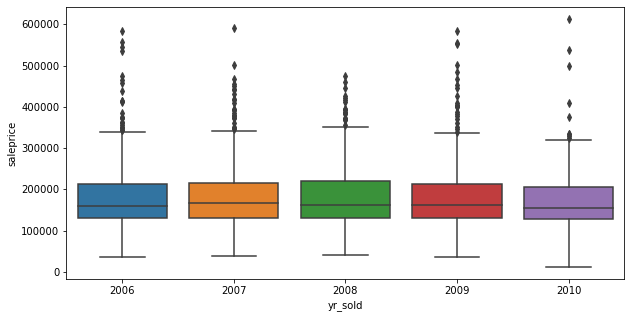

In [82]:
# How volatile prices were depending on a year?
plt.figure(figsize = (10,5))
sns.boxplot(data = train, x = 'yr_sold', y = 'saleprice');

In [83]:
train.groupby(by = 'yr_sold')['saleprice'].median()

yr_sold
2006    159500.0
2007    167150.0
2008    163000.0
2009    163000.0
2010    155000.0
Name: saleprice, dtype: float64

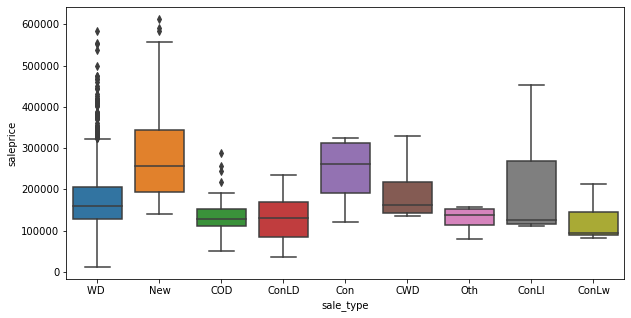

In [84]:
# I would say prices didn't change dramatically over years
# Is sale type important?
plt.figure(figsize = (10,5))
sns.boxplot(data = train, x = 'sale_type', y = 'saleprice');

In [85]:
train.groupby(by = 'sale_type')['saleprice'].median()

sale_type
COD      127500.0
CWD      160750.0
Con      261615.0
ConLD    130000.0
ConLI    125000.0
ConLw     95000.0
New      257558.0
Oth      137050.0
WD       158500.0
Name: saleprice, dtype: float64

In [86]:
train['sale_type'].value_counts()

WD       1779
New       160
COD        63
ConLD      17
CWD        10
ConLI       7
ConLw       5
Con         4
Oth         4
Name: sale_type, dtype: int64

In [87]:
# New houses cost significantly more, so I'm going to use this feature in the model
train['sale_type'] = train['sale_type'].map(lambda i: 1 if i == 'New' else 0)
test['sale_type'] = test['sale_type'].map(lambda i: 1 if i == 'New' else 0)

# Renaming column so it's clear what does it mean
train.rename(columns={'sale_type': 'new_property'}, inplace = True)
test.rename(columns={'sale_type': 'new_property'}, inplace = True)

##### Final cleaning

In [88]:
# Let's add heating and electrical systems condition to the overall score
train['condition'] = train['score'] + train['heating_qc'] + train['electrical'] + train['garage_type']
test['condition'] = test['score'] + test['heating_qc'] + test['electrical'] + test['garage_type']

In [89]:
# Floating Villages are more expensive, so I'm going to include it as a binary feature
train['floating_village'] = train['ms_zoning'].apply(lambda x: 1 if 'FV' in x else 0)
test['floating_village'] = test['ms_zoning'].apply(lambda x: 1 if 'FV' in x else 0)

In [90]:
# Property subclass is important, but in my opinion it's already included in Square footage columns and number of rooms, so I'm going to drop it together with ms_zoning. Also removing all other excessive columns
train.drop(columns = ['mo_sold', 'yr_sold', 'heating_qc', 'electrical', 'score', 'ms_subclass','ms_zoning', 'garage_type'], inplace = True)
test.drop(columns = ['mo_sold', 'yr_sold', 'heating_qc', 'electrical', 'score', 'ms_subclass', 'ms_zoning', 'garage_type'], inplace = True)

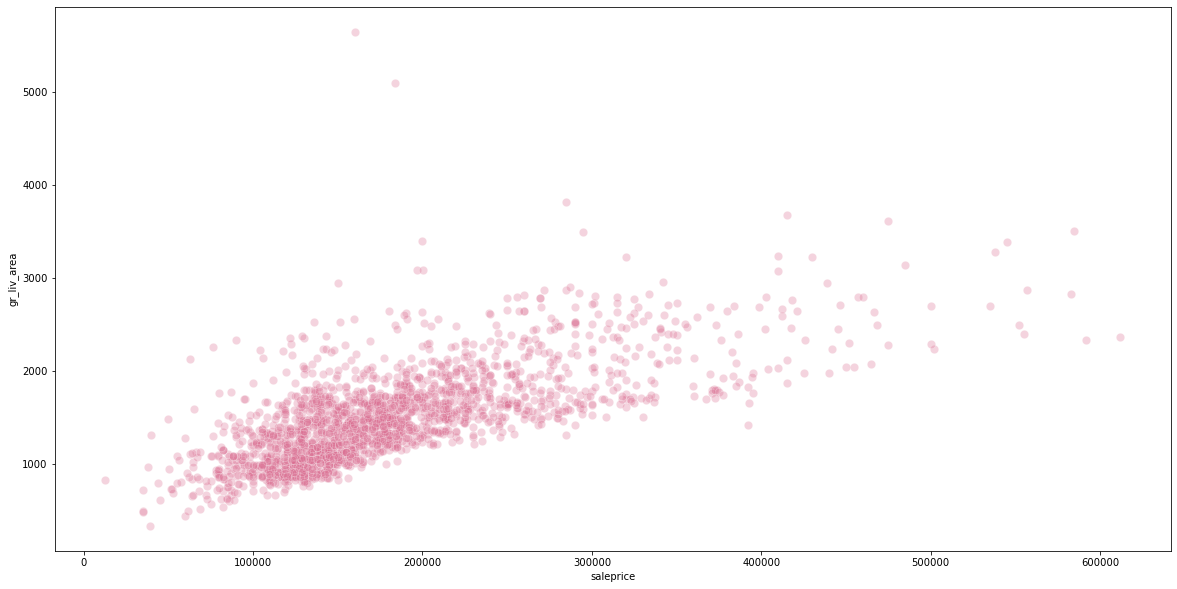

In [91]:
# Final check for outliers
plt.figure(figsize = (20,10))
sns.scatterplot(data = train, x = 'saleprice', y = 'gr_liv_area', s = 70, alpha = 0.3, color = 'palevioletred');

In [93]:
# I see at least two outliers, so going to remove them on from train data. Because test data needs to keep the original amount of rows
train.drop(train[train.gr_liv_area > 4000].index, inplace = True)

In [94]:
# If there are any null values?
train.isnull().sum()

id                  0
lot_area            0
land_slope          0
central_air         0
gr_liv_area         0
totrms_abvgrd       0
new_property        0
saleprice           0
paved               0
irregular           0
cul_de_sac          0
positive_feature    0
noisy               0
years_old           0
non-living          1
baseline            0
condition           0
floating_village    0
dtype: int64

In [95]:
test.isnull().sum()

id                  0
lot_area            0
land_slope          0
central_air         0
gr_liv_area         0
totrms_abvgrd       0
new_property        0
paved               0
irregular           0
cul_de_sac          0
positive_feature    0
noisy               0
years_old           0
non-living          0
baseline            0
condition           0
floating_village    0
dtype: int64

In [96]:
# Dropping NA in train data
train.dropna(inplace = True)

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 2048
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2046 non-null   int64  
 1   lot_area          2046 non-null   int64  
 2   land_slope        2046 non-null   int64  
 3   central_air       2046 non-null   int64  
 4   gr_liv_area       2046 non-null   int64  
 5   totrms_abvgrd     2046 non-null   int64  
 6   new_property      2046 non-null   int64  
 7   saleprice         2046 non-null   int64  
 8   paved             2046 non-null   uint8  
 9   irregular         2046 non-null   int64  
 10  cul_de_sac        2046 non-null   int64  
 11  positive_feature  2046 non-null   int64  
 12  noisy             2046 non-null   int64  
 13  years_old         2046 non-null   int64  
 14  non-living        2046 non-null   float64
 15  baseline          2046 non-null   float64
 16  condition         2046 non-null   int64  


In [102]:
train.shape, test.shape

((2046, 18), (878, 17))

In [98]:
test.head()

,id,lot_area,land_slope,central_air,gr_liv_area,totrms_abvgrd,new_property,paved,irregular,cul_de_sac,positive_feature,noisy,years_old,non-living,baseline,condition,floating_village
0,2658,9142,0,0,1928,9,0,1,0,0,0,0,56,1192,120000.0,22,0
1,2718,9662,0,1,1967,10,0,1,1,0,0,0,29,2137,135000.0,21,0
2,2414,17104,0,1,1496,7,1,1,1,0,0,0,0,778,180750.0,26,0
3,1989,8520,0,1,968,5,0,1,0,0,0,0,1,1152,120000.0,21,0
4,625,9500,0,1,1394,6,0,1,1,0,0,0,46,1655,141000.0,24,0


In [99]:
train.head()

,id,lot_area,land_slope,central_air,gr_liv_area,totrms_abvgrd,new_property,saleprice,paved,irregular,cul_de_sac,positive_feature,noisy,years_old,non-living,baseline,condition,floating_village
0,109,13517,0,1,1479,6,0,130500,1,1,1,0,1,5,769.0,135000.0,28,0
1,544,11492,0,1,2122,8,0,220000,1,1,1,0,0,12,987.0,181000.0,26,0
2,153,7922,0,1,1057,5,0,109000,1,0,0,0,0,3,1109.0,141000.0,22,0
3,318,9802,0,1,1444,7,0,174000,1,0,0,0,0,3,484.0,220000.0,24,0
4,255,14235,0,1,1445,6,0,138500,1,1,0,0,0,17,735.0,181000.0,24,0


In [100]:
# Saving cleaned data
train.to_csv('../datasets/predictors.csv', index = False)
test.to_csv('../datasets/target.csv', index = False)